In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from scipy import stats

Задание 1

In [20]:
# a) Генерация гауссовского шума
np.random.seed(42)
n_points = 500
gaussian_noise = np.random.normal(loc=0, scale=1, size=n_points)
time_index = np.arange(n_points)

# Создание DataFrame
df_noise = pd.DataFrame({
    'Time': time_index,
    'Value': gaussian_noise
})

In [21]:
df_noise.head()

,Time,Value
0,0,0.496714
1,1,-0.138264
2,2,0.647689
3,3,1.523030
4,4,-0.234153


Text(0.5, 1.0, 'Гауссовский шум: N(0, 1)')

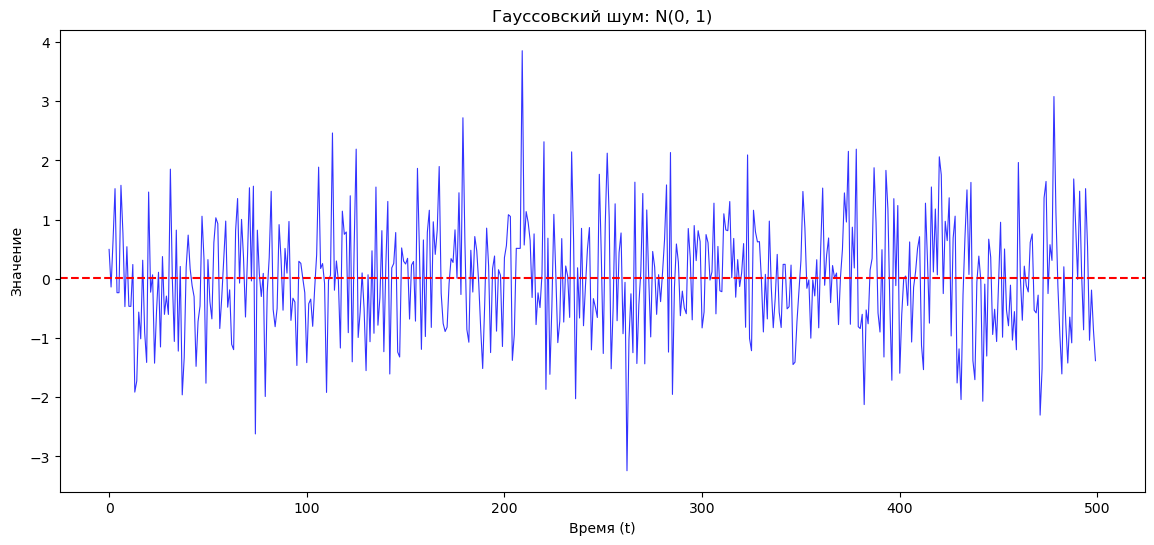

In [22]:
# б) Построение графика
plt.figure(figsize=(14, 6))
plt.plot(df_noise['Time'], df_noise['Value'], 'b-', linewidth=0.8, alpha=0.8)
plt.axhline(y=gaussian_noise.mean(), color='r', linestyle='--')
plt.xlabel('Время (t)')
plt.ylabel('Значение')
plt.title('Гауссовский шум: N(0, 1)')


In [23]:
# в) Тест Дики-Фуллера
adf_result = adfuller(gaussian_noise, autolag='AIC')
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

print(f"ADF статистика: {adf_statistic}")
print(f"p-value: {p_value}")
print(f"Критические значения:")
for key, value in critical_values.items():
    print(f" {key}: {value}")

alpha = 0.05
print(f"\nУровень значимости α = {alpha}")
if p_value < alpha:
    print("p-value < α: Отвергаем H0 (ряд СТАЦИОНАРНЫЙ)")
else:
    print("p-value ≥ α: Не отвергаем H0 (ряд НЕСТАЦИОНАРНЫЙ)")

print(f"\nСравнение с критическими значениями:")
if adf_statistic < critical_values['1%']:
    print("ADF < 1%: Сильная уверенность в стационарности")
elif adf_statistic < critical_values['5%']:
    print("ADF < 5%: Средняя уверенность в стационарности")
elif adf_statistic < critical_values['10%']:
    print("ADF < 10%: Слабая уверенность в стационарности")
else:
    print("ADF > 10%: Нестационарный ряд")

ADF статистика: -22.343814515377066
p-value: 0.0
Критические значения:
 1%: -3.4435228622952065
 5%: -2.867349510566146
 10%: -2.569864247011056

Уровень значимости α = 0.05
p-value < α: Отвергаем H0 (ряд СТАЦИОНАРНЫЙ)

Сравнение с критическими значениями:
ADF < 1%: Сильная уверенность в стационарности


Задание 2

In [24]:
# а) Добавление тренда
trend_slope = 0.001
trend_component = trend_slope * time_index
series_with_trend = gaussian_noise + trend_component

df_trend = pd.DataFrame({
    'Time': time_index,
    'Noise': gaussian_noise,
    'Trend': trend_component,
    'Series_with_Trend': series_with_trend
})

df_trend

,Time,Noise,Trend,Series_with_Trend
0,0,0.496714,0.000,0.496714
1,1,-0.138264,0.001,-0.137264
2,2,0.647689,0.002,0.649689
3,3,1.523030,0.003,1.526030
4,4,-0.234153,0.004,-0.230153
...,...,...,...,...
495,495,0.538910,0.495,1.033910
496,496,-1.037246,0.496,-0.541246
497,497,-0.190339,0.497,0.306661
498,498,-0.875618,0.498,-0.377618


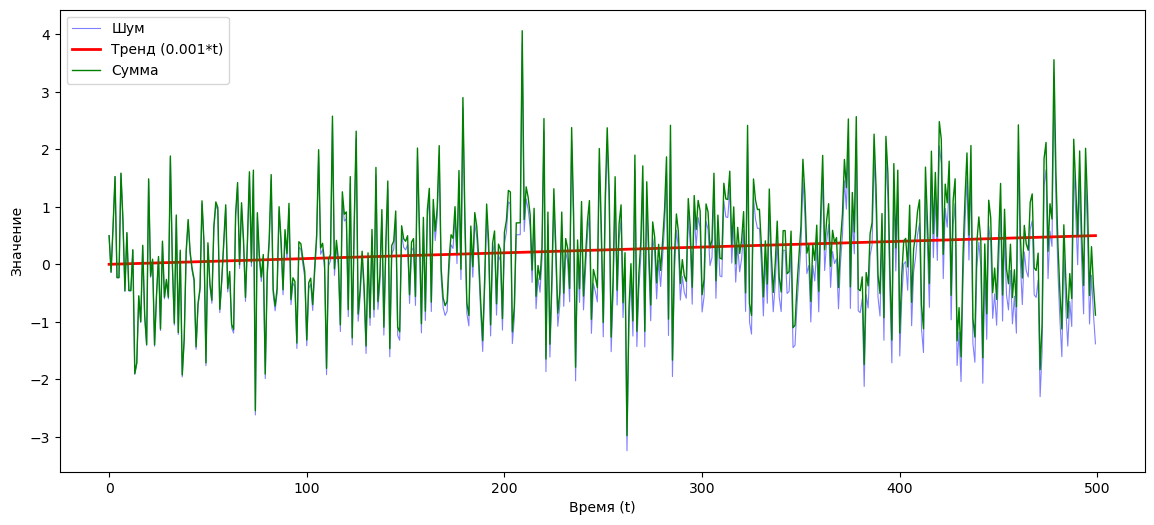

In [25]:
# б) Построение графиков
plt.figure(figsize=(14, 6))

plt.plot(df_trend['Time'], df_trend['Noise'], 'b-', alpha=0.5, label='Шум', linewidth=0.8)
plt.plot(df_trend['Time'], df_trend['Trend'], 'r-', label='Тренд (0.001*t)', linewidth=2)
plt.plot(df_trend['Time'], df_trend['Series_with_Trend'], 'g-', label='Сумма', linewidth=1)
plt.xlabel('Время (t)')
plt.ylabel('Значение')
plt.legend()

In [26]:
# в) Тест Дики-Фуллера для ряда с трендом
adf_result_trend = adfuller(series_with_trend, autolag='AIC')
adf_statistic_trend = adf_result_trend[0]
p_value_trend = adf_result_trend[1]
critical_values_trend = adf_result_trend[4]

print(f"ADF статистика: {adf_statistic_trend:.4f}")
print(f"p-value: {p_value_trend:.6f}")
print(f" Критические значения:")
for key, value in critical_values_trend.items():
    print(f"     {key}: {value:.4f}")

# Проверка гипотезы
print(f"\nУровень значимости α = {alpha}")
if p_value_trend < alpha:
    print("p-value < α: Отвергаем H0 (ряд СТАЦИОНАРНЫЙ)")
else:
    print("p-value ≥ α: Не отвергаем H0 (ряд НЕСТАЦИОНАРНЫЙ)")

print(f"\nСравнение с критическими значениями:")
if adf_statistic_trend < critical_values_trend['1%']:
    print("ADF < 1%: Сильная уверенность в стационарности")
elif adf_statistic_trend < critical_values_trend['5%']:
    print("ADF < 5%: Средняя уверенность в стационарности")
elif adf_statistic_trend < critical_values_trend['10%']:
    print("ADF < 10%: Слабая уверенность в стационарности")
else:
    print("ADF > 10%: Нестационарный ряд")


ADF статистика: -21.7302
p-value: 0.000000
 Критические значения:
     1%: -3.4435
     5%: -2.8673
     10%: -2.5699

Уровень значимости α = 0.05
p-value < α: Отвергаем H0 (ряд СТАЦИОНАРНЫЙ)

Сравнение с критическими значениями:
ADF < 1%: Сильная уверенность в стационарности


Задание 3

In [27]:
df_passengers = pd.read_csv("passengers.csv")

In [28]:
df_passengers['Month'] = pd.to_datetime(df_passengers['Month'], format='%Y-%m')
df_passengers.set_index('Month', inplace=True)
df_passengers.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

In [29]:
df_passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [30]:
# а) Разбиение на 3 части и расчет статистик
n = len(df_passengers)
part_size = n // 3

parts = []
stats_original = []

for i in range(3):
    start_idx = i * part_size
    end_idx = (i + 1) * part_size if i < 2 else n
    part = df_passengers.iloc[start_idx:end_idx]
    parts.append(part)
    
    mean_val = part['Passengers'].mean()
    var_val = part['Passengers'].var()
    stats_original.append({
        'Часть': i+1,
        'Период': f"{part.index[0].year}-{part.index[-1].year}",
        'Наблюдения': len(part),
        'Среднее': mean_val,
        'Дисперсия': var_val,
    })

In [31]:
stats_df_original = pd.DataFrame(stats_original)
stats_df_original

,Часть,Период,Наблюдения,Среднее,Дисперсия
0,1,1949-1952,48,158.375000,1094.664894
1,2,1953-1956,48,269.041667,3105.998227
2,3,1957-1960,48,413.479167,6161.999557


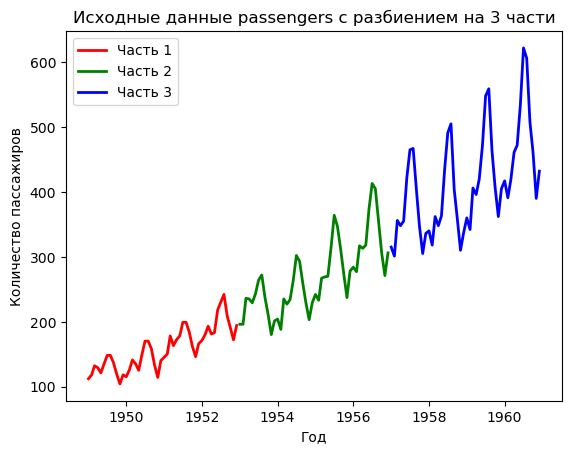

In [32]:
colors = ['red', 'green', 'blue']
for i, part in enumerate(parts):
    plt.plot(part.index, part['Passengers'], color=colors[i], 
                 label=f'Часть {i+1}', linewidth=2)
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.title('Исходные данные passengers с разбиением на 3 части')
plt.legend()


б) Вывод о стационарности исходных данных:
1. Явный восходящий тренд (средние значения возрастают)
2. Увеличивается дисперсия
3. Есть сезонные пики

Вывод: Исходный ряд НЕСТАЦИОНАРНЫЙ

In [33]:
# в) Логарифмирование данных
df_passengers['Passengers_log'] = np.log(df_passengers['Passengers'])

# Разбиение логарифмированных данных на 3 части
parts_log = []
stats_log = []

for i in range(3):
    start_idx = i * part_size
    end_idx = (i + 1) * part_size if i < 2 else n
    part_log = df_passengers.iloc[start_idx:end_idx]
    parts_log.append(part_log)
    
    mean_log = part_log['Passengers_log'].mean()
    var_log = part_log['Passengers_log'].var()
    stats_log.append({
        'Часть': i+1,
        'Период': f"{part_log.index[0].year}-{part_log.index[-1].year}",
        'Наблюдения': len(part_log),
        'Среднее': mean_log,
        'Дисперсия': var_log,
    })

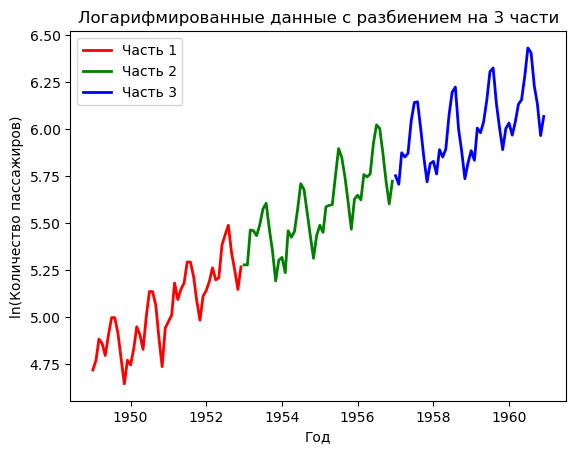

In [34]:
for i, part_log in enumerate(parts_log):
    plt.plot(part_log.index, part_log['Passengers_log'], color=colors[i], 
                 label=f'Часть {i+1}', linewidth=2)
plt.xlabel('Год')
plt.ylabel('ln(Количество пассажиров)')
plt.title('Логарифмированные данные с разбиением на 3 части')
plt.legend()


In [35]:
stats_df_log = pd.DataFrame(stats_log)
stats_df_log


,Часть,Период,Наблюдения,Среднее,Дисперсия
0,1,1949-1952,48,5.043911,0.042901
1,2,1953-1956,48,5.574733,0.040512
2,3,1957-1960,48,6.007884,0.033400


г) Вывод о стационарности логарифмированных данных
1. Тренд стал более линейным
2. Дисперсия стабилизировалась
3. Сезонные колебания имеют более постоянную амплитуду
4. Средние значения по частям все еще различаются

Вывод: Логарифмированный ряд также нестационарный, однако он более близок к станционарному, чем исходный

In [36]:
# д) Тест Дики-Фуллера для исходных данных
adf_result_original = adfuller(df_passengers['Passengers'], autolag='AIC')
print(f"ADF статистика: {adf_result_original[0]:.4f}")
print(f"p-value: {adf_result_original[1]:.6f}")
print(f"Критические значения: 1%={adf_result_original[4]['1%']:.4f}, "
      f"5%={adf_result_original[4]['5%']:.4f}, 10%={adf_result_original[4]['10%']:.4f}")

if adf_result_original[1] < 0.05:
    print("p-value < 0.05: Ряд стационарный")
else:
    print("p-value ≥ 0.05: Ряд нестационарный")

ADF статистика: 0.8154
p-value: 0.991880
Критические значения: 1%=-3.4817, 5%=-2.8840, 10%=-2.5788
p-value ≥ 0.05: Ряд нестационарный


In [37]:
# е) Тест Дики-Фуллера для логарифмированных данных
adf_result_log = adfuller(df_passengers['Passengers_log'], autolag='AIC')
print(f"ADF статистика: {adf_result_log[0]:.4f}")
print(f"p-value: {adf_result_log[1]:.6f}")
print(f"Критические значения: 1%={adf_result_log[4]['1%']:.4f}, "
      f"5%={adf_result_log[4]['5%']:.4f}, 10%={adf_result_log[4]['10%']:.4f}")

if adf_result_log[1] < 0.05:
    print("p-value < 0.05: Ряд стационарный")
else:
    print("p-value ≥ 0.05: Ряд нестационарный")

ADF статистика: -1.7170
p-value: 0.422367
Критические значения: 1%=-3.4817, 5%=-2.8840, 10%=-2.5788
p-value ≥ 0.05: Ряд нестационарный


Задание 4

In [38]:
# Функция для выполнения ADF теста с разными параметрами
def perform_adf_tests(series, series_name):
    # Параметры regression для теста
    regression_types = ['n', 'c', 'ct', 'ctt']
    regression_names = {
        'n': 'без константы и тренда',
        'c': 'только с константой',
        'ct': 'с константой и линейным трендом',
        'ctt': 'с константой, линейным и квадратичным трендом'
    }
    
    results = []
    
    for reg_type in regression_types:
        adf_result = adfuller(series, autolag='AIC', regression=reg_type)
        
        results.append({
            'Regression': reg_type,
            'Описание': regression_names[reg_type],
            'ADF Stat': adf_result[0],
            'p-value': adf_result[1],
            '1%': adf_result[4]['1%'],
            '5%': adf_result[4]['5%'],
            '10%': adf_result[4]['10%']
        })
        
        # Определение стационарности
        stationary = adf_result[1] < 0.05
        
        print(f"\nПараметр regression='{reg_type}' ({regression_names[reg_type]}):")
        print(f"ADF статистика: {adf_result[0]:.6f}")
        print(f"p-value: {adf_result[1]:.6f}")
        print(f"Критические значения: 1%={adf_result[4]['1%']:.4f}, "
              f"5%={adf_result[4]['5%']:.4f}, 10%={adf_result[4]['10%']:.4f}")
        
        if stationary:
            print(f"Результат: СТАЦИОНАРНЫЙ (p-value < 0.05)")
        else:
            print(f"Результат: НЕСТАЦИОНАРНЫЙ (p-value ≥ 0.05)")
    
    return pd.DataFrame(results)

In [39]:
df_results_original = perform_adf_tests(df_passengers['Passengers'], "Исходные данные")


Параметр regression='n' (без константы и тренда):
ADF статистика: 2.390602
p-value: 0.997180
Критические значения: 1%=-2.5832, 5%=-1.9433, 10%=-1.6149
Результат: НЕСТАЦИОНАРНЫЙ (p-value ≥ 0.05)

Параметр regression='c' (только с константой):
ADF статистика: 0.815369
p-value: 0.991880
Критические значения: 1%=-3.4817, 5%=-2.8840, 10%=-2.5788
Результат: НЕСТАЦИОНАРНЫЙ (p-value ≥ 0.05)

Параметр regression='ct' (с константой и линейным трендом):
ADF статистика: -2.100782
p-value: 0.545659
Критические значения: 1%=-4.0302, 5%=-3.4448, 10%=-3.1472
Результат: НЕСТАЦИОНАРНЫЙ (p-value ≥ 0.05)

Параметр regression='ctt' (с константой, линейным и квадратичным трендом):
ADF статистика: -3.233678
p-value: 0.195942
Критические значения: 1%=-4.4625, 5%=-3.8786, 10%=-3.5818
Результат: НЕСТАЦИОНАРНЫЙ (p-value ≥ 0.05)


In [40]:
df_results_log = perform_adf_tests(df_passengers['Passengers_log'], "Логарифмированные данные")



Параметр regression='n' (без константы и тренда):
ADF статистика: 2.483278
p-value: 0.997997
Критические значения: 1%=-2.5832, 5%=-1.9433, 10%=-1.6149
Результат: НЕСТАЦИОНАРНЫЙ (p-value ≥ 0.05)

Параметр regression='c' (только с константой):
ADF статистика: -1.717017
p-value: 0.422367
Критические значения: 1%=-3.4817, 5%=-2.8840, 10%=-2.5788
Результат: НЕСТАЦИОНАРНЫЙ (p-value ≥ 0.05)

Параметр regression='ct' (с константой и линейным трендом):
ADF статистика: -2.147030
p-value: 0.519681
Критические значения: 1%=-4.0302, 5%=-3.4448, 10%=-3.1472
Результат: НЕСТАЦИОНАРНЫЙ (p-value ≥ 0.05)

Параметр regression='ctt' (с константой, линейным и квадратичным трендом):
ADF статистика: -3.218751
p-value: 0.201547
Критические значения: 1%=-4.4625, 5%=-3.8786, 10%=-3.5818
Результат: НЕСТАЦИОНАРНЫЙ (p-value ≥ 0.05)
